In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score,classification_report,f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

import math
import torch
from torch import nn
from torch import optim
from torchvision.datasets import MNIST
from torch.utils.data import TensorDataset, DataLoader

import torch.nn.functional as F

from torch.autograd import Variable
from torchvision import datasets, transforms
import torch.utils.data as utils
from torch.optim import Adam 
import re

In [9]:
train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('MNIST_data/', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                          
                       ])),
        batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('MNIST_data/', train=False, transform=transforms.Compose([
                           transforms.ToTensor()
                           
                       ])),
        batch_size=64, shuffle=True)

In [2]:
def get_model( internal_node_number=400):
    model = nn.Sequential()
    model.add_module('l1', nn.Linear(784, internal_node_number))
    model.add_module('r1', nn.Sigmoid())
    model.add_module('lf', nn.Linear(internal_node_number, 10))

    model.to(device)
    return model

In [7]:
def evaluate_model(test_loader, model, print_results=True):
    model.eval()
    
    test_loss = 0
    correct = 0
    criterion = nn.CrossEntropyLoss()
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            data = data.view(data.size(0), -1)
            output = model(data)
            
            test_loss += criterion(output, target).item()  # sum up batch loss
            predicted_labels = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += predicted_labels.eq(target.view_as(predicted_labels)).sum().item()

    test_loss /= len(test_loader.dataset)
    
    if print_results:
      print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
          test_loss, correct, len(test_loader.dataset),
          100. * correct / len(test_loader.dataset)))
    
    return (test_loss, correct / len(test_loader.dataset))

In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
device = 'cpu'

cuda


In [20]:
model = get_model()

In [45]:
def load_model(PATH):
    model = get_model()
    model.load_state_dict(torch.load(PATH))
    return model

In [22]:
evaluate_model(test_loader, model)


Test set: Average loss: 0.0010, Accuracy: 9825/10000 (98%)



(0.0010198211614508182, 0.9825)

In [23]:
len(model.l1.weight)

400

In [31]:
model.l1.weight.detach().numpy()

array([[-4.723931e-40,  8.418357e-40,  4.958354e-40, ...,  8.701713e-40,
        -2.601693e-40, -1.554452e-39],
       [-4.431859e-40, -1.445589e-39,  2.578557e-40, ..., -1.284441e-39,
        -5.710782e-40,  8.498090e-40],
       [-1.708404e-39,  1.217253e-39, -1.102794e-40, ...,  9.314445e-40,
        -1.025466e-39, -1.332622e-39],
       ...,
       [-9.222898e-40,  2.787057e-40, -1.052549e-39, ..., -8.230078e-40,
        -1.412215e-40,  6.404593e-40],
       [-1.712496e-39, -6.999360e-40,  1.311189e-39, ..., -1.038966e-39,
         4.963287e-40, -8.119544e-41],
       [ 5.625583e-40, -2.566338e-40,  8.367265e-40, ...,  7.854054e-40,
         9.098673e-40,  9.527751e-40]], dtype=float32)

In [32]:
X = model.l1.weight.detach().numpy()

In [53]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [34]:
X_embedded = TSNE(n_components=2).fit_transform(X)

In [65]:
def draw_embd_space(X,color = 'r', T = True):
    if T:
        X_embedded = TSNE(n_components=2).fit_transform(X)
    else:
        X_embedded = PCA(n_components=2).fit(X).transform(X)
    plt.figure(figsize=(10, 10))
    for z in X_embedded:
         plt.scatter(z[0], z[1] , alpha=0.8, color = color)
    plt.grid()
    plt.show()

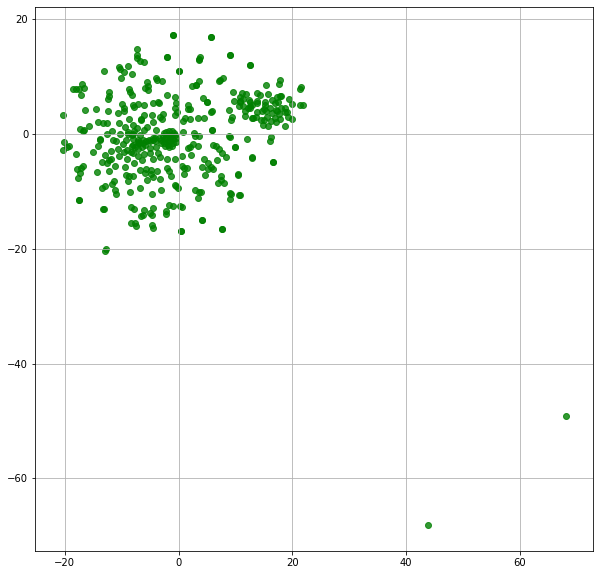

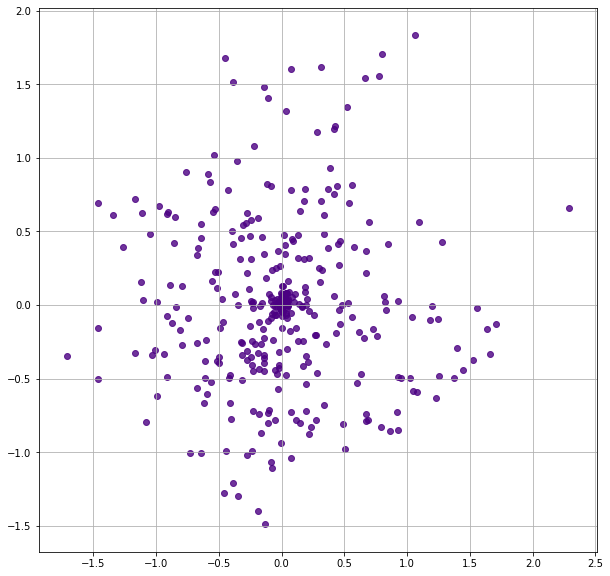

In [68]:
draw_embd_space(model.l1.weight.detach().numpy() , color = 'g')
draw_embd_space(model.l1.weight.detach().numpy() , color = 'indigo' , T = False)

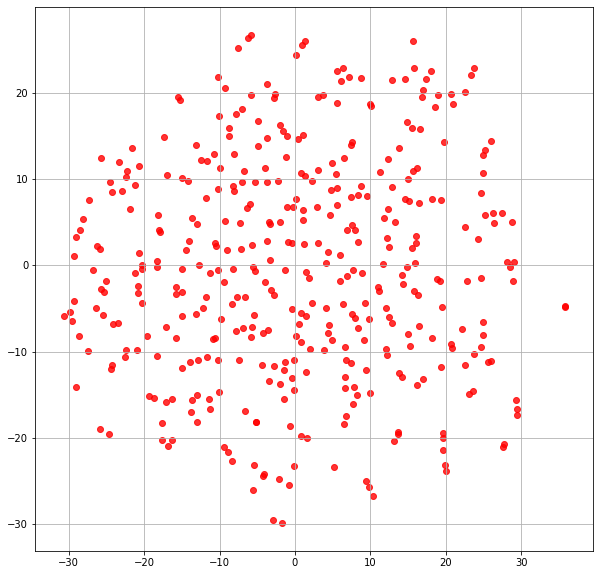

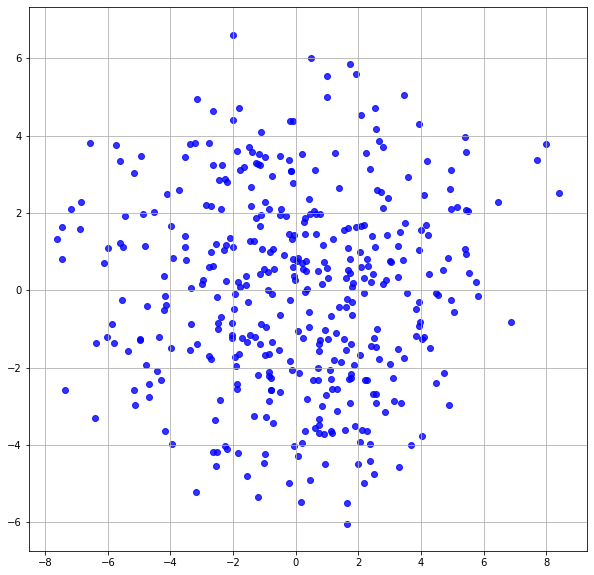

In [67]:
m_inf = load_model('var_inf')
draw_embd_space(m_inf.l1.weight.detach().numpy() , color = 'r')
draw_embd_space(m_inf.l1.weight.detach().numpy() , color = 'b' , T = False)